In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from isyatirimhisse import fetch_data, fetch_financials, visualize_data

In [6]:
mgros=yf.download("MGROS.IS",start="2011-12-30",end="2023-10-01")


[*********************100%%**********************]  1 of 1 completed


In [4]:
symbol='MGROS'
start_year='2011'
end_year='2023'
save_to_excel=True
language='tr'

veri = fetch_financials(
    symbol=symbol,
    start_year=start_year,
    end_year=end_year,
    save_to_excel=save_to_excel,
    language=language
)
bilanco=pd.read_excel("finansallar_MGROS_20231003.xlsx")
bilanco=bilanco.T


In [5]:
bilanco.columns=bilanco.iloc[1]
bilanco=bilanco.drop([bilanco.index[0],bilanco.index[1]])
bilanco["Çeyreklik Kar"]=0


In [7]:
for i in range(0,50):
   if i%4==0:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
   else:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
bilanco["Çeyreklik Kar"]

C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\3152838637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\3152838637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\3152838637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

2011/3     -128381000
2011/6     -198602000
2011/9       91225000
2011/12      72588000
2012/3       61549000
2012/6       72928000
2012/9      -17381000
2012/12     -28960000
2013/3       34890000
2013/6     -160801000
2013/9     -180630000
2013/12    -156592000
2014/3      -61224000
2014/6      103267000
2014/9       30966000
2014/12      23182000
2015/3        5422000
2015/6     -119275000
2015/9     -341659000
2015/12      85059000
2016/3      -25743000
2016/6      -36286000
2016/9       -1386000
2016/12    -236691000
2017/3      906033000
2017/6     -119421000
2017/9      -71591000
2017/12    -205985000
2018/3     -245886000
2018/6     -293673000
2018/9     -666963000
2018/12     371085000
2019/3     -230816000
2019/6     -150470000
2019/9      178888000
2019/12    -258272000
2020/3     -131867000
2020/6     -144437000
2020/9       -1834000
2020/12    -124811000
2021/3      209510000
2021/6        1759000
2021/9      155962000
2021/12      -8350000
2022/3      158587000
2022/6    

In [8]:
bilanco["Yıllıklandırılmış Kar"]=bilanco["Çeyreklik Kar"].rolling(4).sum()
bilanco["Yıllıklandırılmış Kar"]



2011/3              NaN
2011/6              NaN
2011/9              NaN
2011/12   -1.631700e+08
2012/3     2.676000e+07
2012/6     2.982900e+08
2012/9     1.896840e+08
2012/12    8.813600e+07
2013/3     6.147700e+07
2013/6    -1.722520e+08
2013/9    -3.355010e+08
2013/12   -4.631330e+08
2014/3    -5.592470e+08
2014/6    -2.951790e+08
2014/9    -8.358300e+07
2014/12    9.619100e+07
2015/3     1.628370e+08
2015/6    -5.970500e+07
2015/9    -4.323300e+08
2015/12   -3.704530e+08
2016/3    -4.016180e+08
2016/6    -3.186290e+08
2016/9     2.164400e+07
2016/12   -3.001060e+08
2017/3     6.316700e+08
2017/6     5.485350e+08
2017/9     4.783300e+08
2017/12    5.090360e+08
2018/3    -6.428830e+08
2018/6    -8.171350e+08
2018/9    -1.412507e+09
2018/12   -8.354370e+08
2019/3    -8.203670e+08
2019/6    -6.771640e+08
2019/9     1.686870e+08
2019/12   -4.606700e+08
2020/3    -3.617210e+08
2020/6    -3.556880e+08
2020/9    -5.364100e+08
2020/12   -4.029490e+08
2021/3    -6.157200e+07
2021/6     8.462

In [9]:
bilanco=bilanco.tail(47)

<Axes: title={'center': 'Yıllık Kar'}>

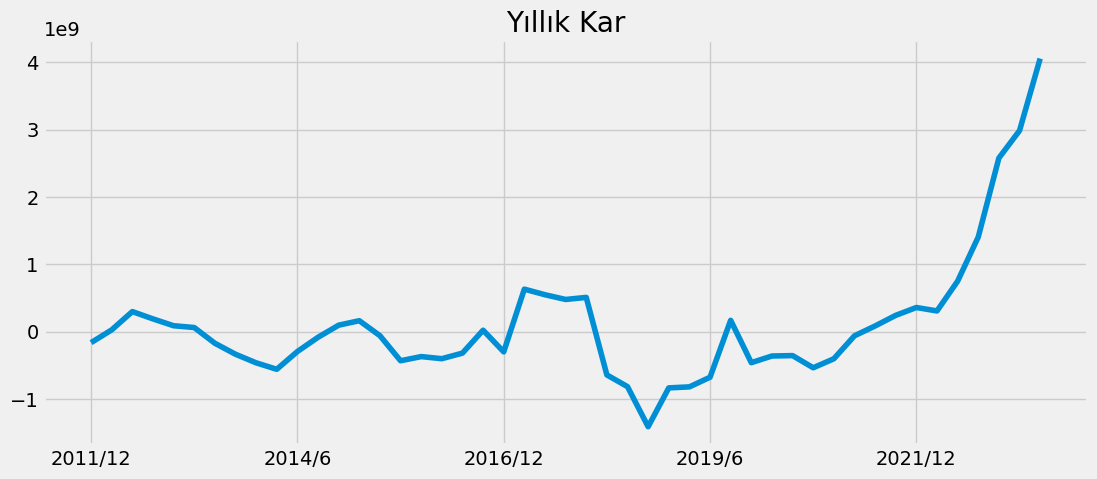

In [10]:
bilanco["Yıllıklandırılmış Kar"].plot(kind="line",figsize=(12,5),title="Yıllık Kar")




In [92]:
fiyat=pd.DataFrame()
dönem=pd.date_range(start="2011-12-30",end="2023-10-01",freq="Q")
fiyat["Fiyat"]=mgros["Close"].resample("Q").last()



# Güncellenmiş DataFrame'i gösterelim
fiyat

,Fiyat
Date,
2011-12-31,12.700000
2012-03-31,16.250000
2012-06-30,17.900000
2012-09-30,18.700001
2012-12-31,21.500000
2013-03-31,22.650000
2013-06-30,19.750000
2013-09-30,16.950001
2013-12-31,16.000000


In [12]:
dönem=pd.date_range(start="2011-12-31",end="2023-07-01",freq="Q")
bilanco=bilanco.set_index(dönem)
bilanco

MGROS,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Diğer Alacaklar,Stoklar,Canlı Varlıklar,Diğer Dönen Varlıklar,(Ara Toplam),...,Finansman Faaliyetlerden Kaynaklanan Nakit,Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış,Yab.ı Para Çevrim Fark. Nakit Ve Nakit Benz. Üzerindeki Etkisi,Diğer Nakit Girişi/Çıkışı,Nakit ve Benzerlerindeki Değişim,Diğer Nakit ve Nakit Benzerlerindeki Artış,Dönem Başı Nakit Değerler,Dönem Sonu Nakit,Çeyreklik Kar,Yıllıklandırılmış Kar
2011-12-31,1788260000.0,1010255000.0,0.0,67174000.0,0.0,1037000.0,679000000.0,0.0,30794000.0,1788260000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72588000,-1.631700e+08
2012-03-31,1788951000.0,996895000.0,0.0,54620000.0,0.0,1917000.0,676383000.0,0.0,59136000.0,1788951000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61549000,2.676000e+07
2012-06-30,1803353000.0,959808000.0,0.0,50784000.0,0.0,2759000.0,734862000.0,0.0,55140000.0,1803353000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72928000,2.982900e+08
2012-09-30,2003267000,1114297000,0,71521000,0,2439000,755856000,0,59154000,2003267000,...,-80969000,104989000,-947000,0,104042000,0,1010255000,1114297000,-17381000,1.896840e+08
2012-12-31,1908550000.0,1040867000.0,0.0,47345000.0,0.0,1233000.0,786036000.0,0.0,33069000.0,1908550000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28960000,8.813600e+07
2013-03-31,1797719000.0,900946000.0,0.0,54003000.0,0.0,2554000.0,773523000.0,0.0,66693000.0,1797719000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34890000,6.147700e+07
2013-06-30,2045361000.0,1071366000.0,0.0,57100000.0,0.0,2600000.0,873139000.0,0.0,41156000.0,2045361000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-160801000,-1.722520e+08
2013-09-30,2156218000,1217660000,0,55701000,0,2542000,842754000,0,37561000,2156218000,...,-199940000,168143000,8650000,0,176793000,0,1040867000,1217660000,-180630000,-3.355010e+08
2013-12-31,1970712000,1038329000,9726000,48395000,0,2285000,841228000,0,30749000,1970712000,...,-264182000,-14602000,12064000,0,-2538000,0,1040867000,1038329000,-156592000,-4.631330e+08
2014-03-31,2036856000.0,1095883000.0,13248000.0,54073000.0,0.0,2284000.0,830889000.0,0.0,40479000.0,2036856000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-61224000,-5.592470e+08


In [13]:

bilanco=bilanco.loc[:, (bilanco != 0).all(axis=0)]
bilanco

MGROS,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Ticari Alacaklar,Diğer Alacaklar,Stoklar,Diğer Dönen Varlıklar,(Ara Toplam),Duran Varlıklar,Diğer Alacaklar,Finansal Yatırımlar,...,Serbest Nakit Akım,Diğer Finansman Faaliyetlerinden Nakit,Finansman Faaliyetlerden Kaynaklanan Nakit,Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış,Yab.ı Para Çevrim Fark. Nakit Ve Nakit Benz. Üzerindeki Etkisi,Nakit ve Benzerlerindeki Değişim,Dönem Başı Nakit Değerler,Dönem Sonu Nakit,Çeyreklik Kar,Yıllıklandırılmış Kar
2011-12-31,1788260000.0,1010255000.0,67174000.0,1037000.0,679000000.0,30794000.0,1788260000.0,3692704000.0,1165000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72588000,-1.631700e+08
2012-03-31,1788951000.0,996895000.0,54620000.0,1917000.0,676383000.0,59136000.0,1788951000.0,3669102000.0,1163000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61549000,2.676000e+07
2012-06-30,1803353000.0,959808000.0,50784000.0,2759000.0,734862000.0,55140000.0,1803353000.0,3687961000.0,1208000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72928000,2.982900e+08
2012-09-30,2003267000,1114297000,71521000,2439000,755856000,59154000,2003267000,3695471000,1283000,1695000,...,185958000,-80969000,-80969000,104989000,-947000,104042000,1010255000,1114297000,-17381000,1.896840e+08
2012-12-31,1908550000.0,1040867000.0,47345000.0,1233000.0,786036000.0,33069000.0,1908550000.0,3715795000.0,1302000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28960000,8.813600e+07
2013-03-31,1797719000.0,900946000.0,54003000.0,2554000.0,773523000.0,66693000.0,1797719000.0,3708941000.0,1311000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34890000,6.147700e+07
2013-06-30,2045361000.0,1071366000.0,57100000.0,2600000.0,873139000.0,41156000.0,2045361000.0,3750350000.0,1356000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-160801000,-1.722520e+08
2013-09-30,2156218000,1217660000,55701000,2542000,842754000,37561000,2156218000,3777004000,1405000,1695000,...,368083000,-199940000,-199940000,168143000,8650000,176793000,1040867000,1217660000,-180630000,-3.355010e+08
2013-12-31,1970712000,1038329000,48395000,2285000,841228000,30749000,1970712000,3815908000,1434000,1695000,...,249580000,-128927000,-264182000,-14602000,12064000,-2538000,1040867000,1038329000,-156592000,-4.631330e+08
2014-03-31,2036856000.0,1095883000.0,54073000.0,2284000.0,830889000.0,40479000.0,2036856000.0,3798396000.0,1434000.0,1695000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-61224000,-5.592470e+08


In [14]:
from evds import evdsAPI
from datetime import date
evds=evdsAPI('dsIC3fiGlu')
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
usd=usd.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del usd["Tarih"]
usd=usd.resample("Q").last()
usd.columns=["USDTRY"]
usd

,USDTRY
2011-12-31,1.867823
2012-03-31,1.787882
2012-06-30,1.824833
2012-09-30,1.804275
2012-12-31,1.787676
2013-03-31,1.810457
2013-06-30,1.897915
2013-09-30,2.020786
2013-12-31,2.061532
2014-03-31,2.221786


In [15]:
bist100=evds.get_data(["TP.MK.F.BILESIK"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del bist100["Tarih"]
bist100=bist100.resample("Q").last()
bist100.columns=["BIST100"]
bist100

,BIST100
2011-12-31,521.31
2012-03-31,623.23
2012-06-30,615.25
2012-09-30,667.25
2012-12-31,784.77
2013-03-31,857.35
2013-06-30,769.11
2013-09-30,743.60
2013-12-31,678.02
2014-03-31,694.98


In [16]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
enf=enf.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del enf["Tarih"]
enf=enf.resample("Q").last()
enf.columns=["TÜFE"]
enf

,TÜFE
2011-12-31,200.85
2012-03-31,203.96
2012-06-30,204.76
2012-09-30,207.55
2012-12-31,213.23
2013-03-31,218.83
2013-06-30,221.75
2013-09-30,223.91
2013-12-31,229.01
2014-03-31,237.18


In [17]:

bilanco=bilanco.dropna(axis=1,how="any")
bilanco["TÜFE"]=enf["TÜFE"]
bilanco["BIST100"]=bist100["BIST100"]
bilanco["USDTRY"]=usd["USDTRY"]
bilanco["Fiyat"]=fiyat["Fiyat"].head(47)




C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\1760472257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["TÜFE"]=enf["TÜFE"]
C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\1760472257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["BIST100"]=bist100["BIST100"]
C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\1760472257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [338]:
X=bilanco.iloc[:,:58]
y=bilanco.iloc[:,58]

In [19]:
for i in X.columns:
    X[i]=X[i].astype(float)


In [339]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=3)  
principal_components = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.84247208451369

In [340]:
X=principal_components
y=bilanco["Fiyat"]


In [341]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [342]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm

#model = LinearRegression()
model=sm.OLS(y_train,X_train)

X_train_with_const = sm.add_constant(X_train)

# Reset the index of y_train to match the index of X_train
y_train_reset_index = y_train.reset_index(drop=True)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train_reset_index, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     322.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.32e-22
Time:                        14:35:38   Log-Likelihood:                -110.85
No. Observations:                  32   AIC:                             229.7
Df Residuals:                      28   BIC:                             235.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7631      1.473     23.602      0.0

In [343]:
tahmin1=pd.DataFrame(results.predict(sm.add_constant(X_test)),columns=["Tahmin"],index=y_test.index)
tahmin1["Gerçek"]=y_test
tahmin1=tahmin1.sort_index()
mse=np.mean((tahmin1["Gerçek"]-tahmin1["Tahmin"])**2)
mse

41.475007091519075

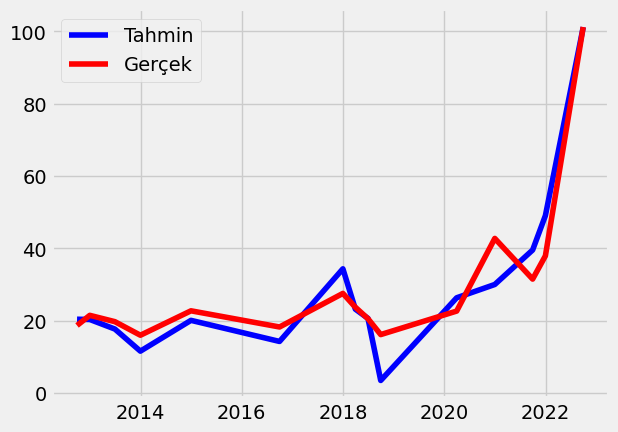

In [344]:
import matplotlib.pyplot as plt
plt.plot(tahmin1["Tahmin"],label="Tahmin",color="blue")
plt.plot(tahmin1["Gerçek"],label="Gerçek",color="red")
plt.legend()

In [345]:
X=bilanco.iloc[:,:58]
y=bilanco.iloc[:,58]

In [346]:
for i in X.columns:
    X[i]=X[i].astype(float)

In [347]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np


# Tahminleri saklamak için bir liste
predictions = []

# Her bir sütun için döngü
for i in range(0,58):  
    # SARIMAX modelini oluşturma
    sarimax_model = SARIMAX(X.iloc[:, i], 
                            order=(0, 1, 1), 
                            seasonal_order=(0, 1, 1, 4))  # Çeyreklik veri için mevsimsel periyot 4

    # Modeli eğitme
    sarimax_fit = sarimax_model.fit(disp=False)

    # Modelin özeti (isteğe bağlı)
    print(sarimax_fit.summary())

    # Gelecekteki 6 değeri tahmin etme
    future_predictions = sarimax_fit.get_forecast(steps=6).predicted_mean

    # Tahminleri listeye ekleme
    predictions.append(future_predictions)

# Tahminleri bir DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions).T  # Transpoze alarak sütunlarla satırları ters çeviriyoruz
predictions_df.columns = X.columns  # Sütun adlarını X DataFrame'inden alıyoruz


extended_X = pd.concat([X, predictions_df], ignore_index=True)



                                     SARIMAX Results                                     
Dep. Variable:                   Dönen Varlıklar   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -923.108
Date:                           Tue, 03 Oct 2023   AIC                           1852.216
Time:                                   14:35:48   BIC                           1857.429
Sample:                               12-31-2011   HQIC                          1854.127
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6009      0.175      3.431      0.001       0.258       0.944
ma.S.L4       -0.1468      0.208     -0.707

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:             Diğer Dönen Varlıklar   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -825.840
Date:                           Tue, 03 Oct 2023   AIC                           1657.680
Time:                                   14:35:49   BIC                           1662.893
Sample:                               12-31-2011   HQIC                          1659.591
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1440      0.753      0.191      0.848      -1.332       1.620
ma.S.L4       -0.8536      0.173     -4.948

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:      Diğer Faaliyet Giderleri (-)   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -862.409
Date:                           Tue, 03 Oct 2023   AIC                           1730.818
Time:                                   14:35:50   BIC                           1736.031
Sample:                               12-31-2011   HQIC                          1732.729
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2664      0.096     -2.783      0.005      -0.454      -0.079
ma.S.L4        0.5046      0.098      5.174

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                           BIST100   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -310.956
Date:                           Tue, 03 Oct 2023   AIC                            627.911
Time:                                   14:35:51   BIC                            633.124
Sample:                               12-31-2011   HQIC                           629.822
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1214      0.143     -0.850      0.396      -0.401       0.159
ma.S.L4       -0.1263      0.561     -0.225

In [356]:
extended_X=extended_X.set_index(pd.date_range(start="2011-12-31",end="2025-01-01",freq="Q"))
extended_X["Yıllıklandırılmış Kar"]=extended_X["Çeyreklik Kar"].rolling(4).sum()
extended_X["HBK"]=extended_X["Yıllıklandırılmış Kar"]/extended_X["Ödenmiş Sermaye"]
extended_X=extended_X.dropna()
extended_X

MGROS,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Ticari Alacaklar,Diğer Alacaklar,Stoklar,Diğer Dönen Varlıklar,(Ara Toplam),Duran Varlıklar,Diğer Alacaklar,Finansal Yatırımlar,...,Kıdem Tazminatı,Finansman Giderleri,Yurtiçi Satışlar,Net Yabancı Para Pozisyonu,Çeyreklik Kar,Yıllıklandırılmış Kar,TÜFE,BIST100,USDTRY,HBK
2012-09-30,2.003267e+09,1.114297e+09,7.152100e+07,2.439000e+06,7.558560e+08,5.915400e+07,2.003267e+09,3.695471e+09,1.283000e+06,1.695000e+06,...,1.131600e+07,-1.658140e+08,4.685104e+09,-2.043673e+09,-1.738100e+07,1.896840e+08,207.550000,667.250000,1.804275,1.065461
2012-12-31,1.908550e+09,1.040867e+09,4.734500e+07,1.233000e+06,7.860360e+08,3.306900e+07,1.908550e+09,3.715795e+09,1.302000e+06,1.695000e+06,...,1.730500e+07,-1.990380e+08,6.271076e+09,-2.048362e+09,-2.896000e+07,8.813600e+07,213.230000,784.770000,1.787676,0.495063
2013-03-31,1.797719e+09,9.009460e+08,5.400300e+07,2.554000e+06,7.735230e+08,6.669300e+07,1.797719e+09,3.708941e+09,1.311000e+06,1.695000e+06,...,7.495000e+06,-3.692200e+07,1.537591e+09,-2.025631e+09,3.489000e+07,6.147700e+07,218.830000,857.350000,1.810457,0.345318
2013-06-30,2.045361e+09,1.071366e+09,5.710000e+07,2.600000e+06,8.731390e+08,4.115600e+07,2.045361e+09,3.750350e+09,1.356000e+06,1.695000e+06,...,1.417600e+07,-2.360320e+08,3.212431e+09,-2.158029e+09,-1.608010e+08,-1.722520e+08,221.750000,769.110000,1.897915,-0.967545
2013-09-30,2.156218e+09,1.217660e+09,5.570100e+07,2.542000e+06,8.427540e+08,3.756100e+07,2.156218e+09,3.777004e+09,1.405000e+06,1.695000e+06,...,2.018100e+07,-5.038740e+08,5.159189e+09,-2.385145e+09,-1.806300e+08,-3.355010e+08,223.910000,743.600000,2.020786,-1.884519
2013-12-31,1.970712e+09,1.038329e+09,4.839500e+07,2.285000e+06,8.412280e+08,3.074900e+07,1.970712e+09,3.815908e+09,1.434000e+06,1.695000e+06,...,2.478900e+07,-7.295720e+08,6.897693e+09,-2.549822e+09,-1.565920e+08,-4.631330e+08,229.010000,678.020000,2.061532,-2.601432
2014-03-31,2.036856e+09,1.095883e+09,5.407300e+07,2.284000e+06,8.308890e+08,4.047900e+07,2.036856e+09,3.798396e+09,1.434000e+06,1.695000e+06,...,9.717000e+06,-1.104730e+08,1.702141e+09,-2.611906e+09,-6.122400e+07,-5.592470e+08,237.180000,694.980000,2.221786,-3.141308
2014-06-30,1.999715e+09,9.435750e+08,5.985800e+07,3.786000e+06,9.575810e+08,3.279200e+07,1.999715e+09,3.805250e+09,1.430000e+06,1.695000e+06,...,1.724800e+07,-8.436700e+07,3.622230e+09,-2.444819e+09,1.032670e+08,-2.951790e+08,242.070000,790.400000,2.119538,-1.658030
2014-09-30,2.139545e+09,1.084036e+09,6.043900e+07,4.858000e+06,9.460050e+08,3.395200e+07,2.139545e+09,3.824416e+09,1.550000e+06,1.695000e+06,...,2.533500e+07,-1.160640e+08,5.875302e+09,-2.365252e+09,3.096600e+07,-8.358300e+07,243.740000,747.140000,2.207559,-0.469488
2014-12-31,1.723289e+09,6.890740e+08,4.784700e+07,7.672000e+06,9.499770e+08,2.871900e+07,1.723289e+09,3.857298e+09,1.691000e+06,1.695000e+06,...,3.175100e+07,-1.829930e+08,7.898055e+09,-2.260638e+09,2.318200e+07,9.619100e+07,247.720000,848.380000,2.291783,0.540308


In [81]:
bist100=evds.get_data(["TP.MK.F.BILESIK"],startdate="01-10-2011",enddate="01-10-2023",frequency=5)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2023-11-01",freq="M"))
del bist100["Tarih"]
bist100.columns=["BIST100"]
bist100

,BIST100
2011-10-31,565.87
2011-11-30,529.97
2011-12-31,521.31
2012-01-31,583.23
2012-02-29,602.36
...,...
2023-06-30,5759.11
2023-07-31,7216.96
2023-08-31,7917.93
2023-09-30,8334.94


In [82]:
best_sarimax_model = SARIMAX(bist100, 
                             order=(1, 1, 1), 
                             seasonal_order=(1, 1, 1, 4))
best_sarimax_fit = best_sarimax_model.fit(disp=False)
future_predictions = best_sarimax_fit.get_forecast(steps=14).predicted_mean
future_predictions=pd.DataFrame(future_predictions)
future_predictions=future_predictions.set_index(pd.date_range(start="2023-11-01",end="2025-01-01",freq="M"))
future_predictions.columns=["BIST100"]
future_predictions


,BIST100
2023-11-30,8554.183512
2023-12-31,8690.893009
2024-01-31,8654.280778
2024-02-29,9151.633411
2024-03-31,9808.381147
2024-04-30,10181.799388
2024-05-31,10338.758367
2024-06-30,10681.132113
2024-07-31,11076.980638
2024-08-31,11345.454022


In [83]:
bist100=pd.concat([bist100,future_predictions], ignore_index=True)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2025-01-01",freq="M"))
bist100=bist100.resample("Q").last()
bist100

,BIST100
2011-12-31,521.310000
2012-03-31,623.230000
2012-06-30,615.250000
2012-09-30,667.250000
2012-12-31,784.770000
2013-03-31,857.350000
2013-06-30,769.110000
2013-09-30,743.600000
2013-12-31,678.020000
2014-03-31,694.980000


In [357]:
extended_X.iloc[44:,55]=[1691,1878,2189,2536,2973,3192] #TÜFE Tahminlerim
extended_X.iloc[44:,56]=bist100["BIST100"].tail(6) #BIST100 Tahminlerim
extended_X.iloc[44:,57]=[26.94,30.41,34.65,36.67,41,46.45] #USDTRY Tahminlerim
#TÜFE ve USDTRY tahminlerimi InflationForecast projemden aldım,onu da inceleyebilirsiniz.


In [390]:
X=extended_X.iloc[:,:58]
y=bilanco["Fiyat"].tail(44)


In [391]:

# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=12)  
principal_components1 = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.9914795380141884

In [392]:
y=bilanco["Fiyat"]
y.loc[pd.Timestamp('2023-09-30')] = 366.5
y=y.tail(45)


C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\1218875242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[pd.Timestamp('2023-09-30')] = 366.5


In [393]:
X=principal_components1[:45]#Regresyonda anlamsız çıkan parametreyi çıkardım

In [394]:

#model = LinearRegression()
model=sm.OLS(y,X)

X_train_with_const = sm.add_constant(X)

# Reset the index of y_train to match the index of X_train
y_train_reset_index = y.reset_index(drop=True)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train_reset_index, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())






                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.37e-28
Time:                        14:38:33   Log-Likelihood:                -147.68
No. Observations:                  45   AIC:                             321.4
Df Residuals:                      32   BIC:                             344.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.7980      2.396     38.726      0.0

In [395]:
tahmin3=pd.DataFrame(results.predict(sm.add_constant(principal_components1)),index=pd.date_range(start="2012-09-30",end="2025-01-01",freq="Q"),columns=["Tahmin"])
mse=np.mean(np.square(tahmin3["Tahmin"].head(47)-bilanco["Fiyat"]))
mse

38.46558940697468

In [396]:
tahmin3.index = pd.to_datetime(tahmin3.index)
tahmin3.index = tahmin3.index.date
y.index = pd.to_datetime(y.index)
y.index = y.index.date

C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\4201150116.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(-5,-15), ha='center',weight="bold",fontsize=10)
C:\Users\Bora\AppData\Local\Temp\ipykernel_13940\4201150116.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10,weight="bold")


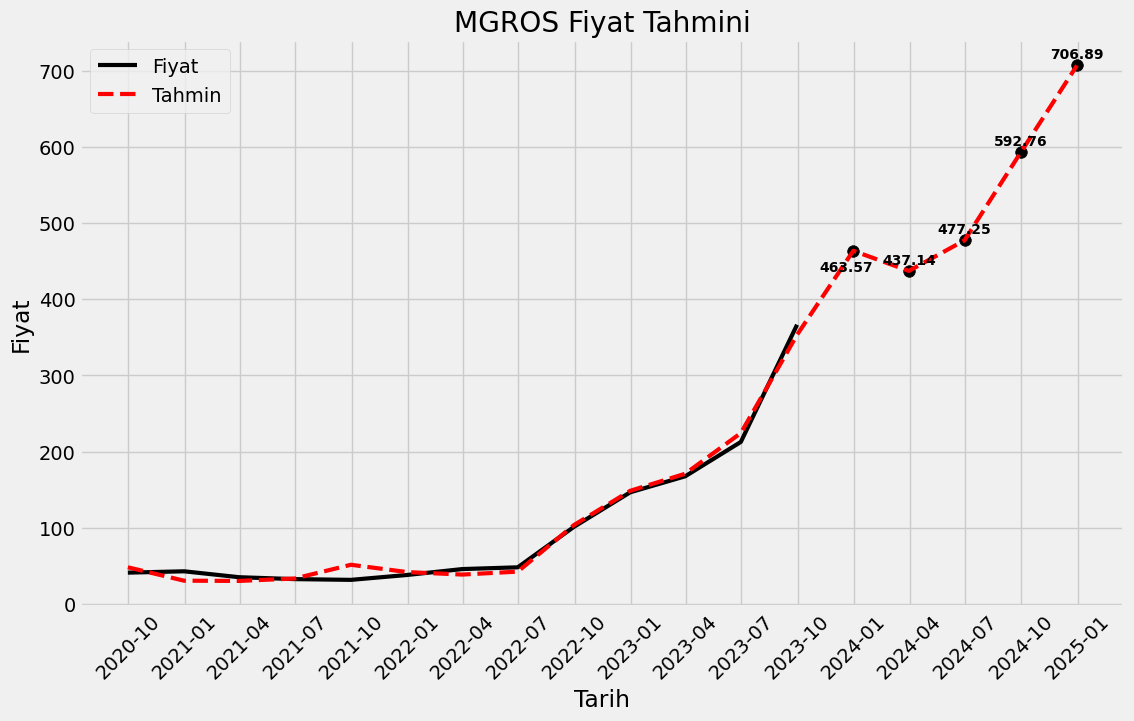

In [397]:
import matplotlib.dates as mdates
y.tail(13).plot(figsize=(12,7),label="Fiyat",color="black",linestyle="-",lw=3)
tahmin3["Tahmin"].tail(18).plot(label="Tahmin",color="red",linestyle="--",lw=3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))  # Çeyrekler için ay ayırıcıları
plt.xticks(rotation=45)
plt.scatter(tahmin3.index[-5::],tahmin3["Tahmin"][-5::],color="black",marker="o",s=70)
plt.title("MGROS Fiyat Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

for i in range(-5,-4):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(-5,-15), ha='center',weight="bold",fontsize=10)
for i in range(-4,0):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10,weight="bold")


plt.legend()
plt.show()